In [1]:
# 1
!pip install mlxtend
!pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# 2
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [3]:
# 3
# Split the dataset into training and testing data
train_data = happiness[happiness['Year'] <= 2014]
test_data = happiness[happiness['Year'] >= 2015]

In [4]:
# 4
# Define X and y for training
X_train = train_data['Year']
y_train = train_data['Life Ladder']

In [7]:
# 7
# Define X_train and y_train
X_train = train_data[['Year']]  # Features (assuming 'Year' is the only feature for now)
y_train = train_data['Life Ladder']  # Target variable

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# 8
# Define X_test and y_test
X_test = test_data[['Year']]  # Features
y_test = test_data['Life Ladder']  # Target variable

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.3159033091079715
R^2 Score: -0.0334097602482224


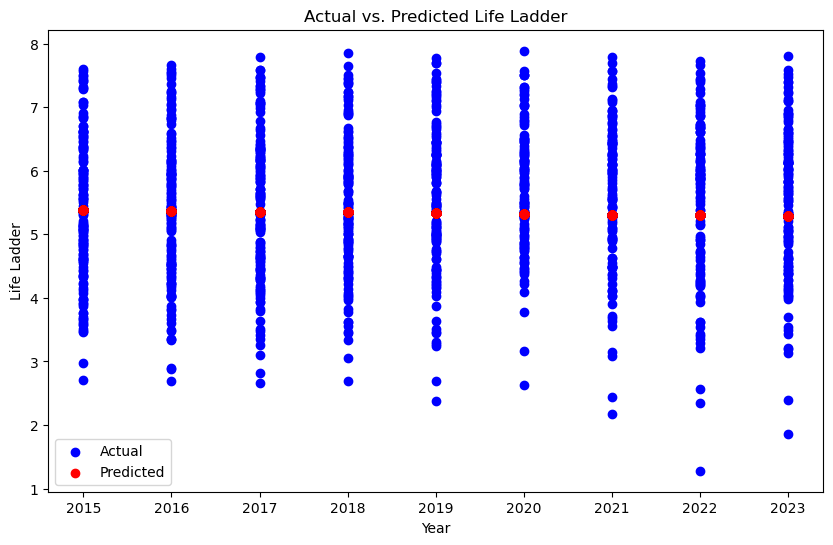

In [9]:
# 9
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Life Ladder')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

In [10]:
# 10
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1.3159033091079715
R-squared Score: -0.0334097602482224


C:\Users\Sean\AppData\Local\Temp\ipykernel_17744\902571872.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal')


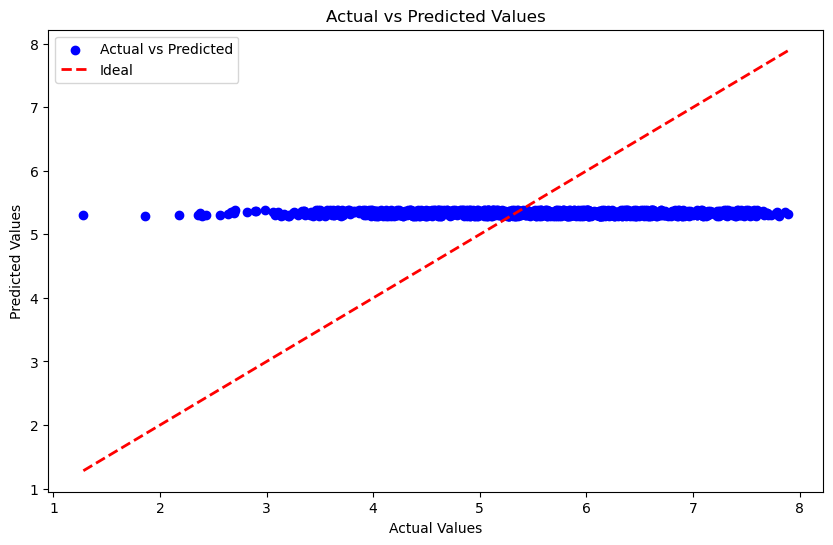

In [11]:
# 11
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [12]:
# 12
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1.3159033091079715
R-squared Score: -0.0334097602482224


In [13]:
# 13
# Filter data for training (2005-2014) and testing (2015-2023)
train_data = happiness[happiness['Year'] <= 2014]
test_data = happiness[happiness['Year'] >= 2015]

# Define features (X) and target variable (y) for training
X_train = train_data.drop(columns=['Year', 'Life Ladder'])
y_train = train_data['Life Ladder']

# Define features (X) and target variable (y) for testing
X_test = test_data.drop(columns=['Year', 'Life Ladder'])
y_test = test_data['Life Ladder']

In [14]:
# 14
# Convert 'Year' column to numeric data type
train_data['Year'] = pd.to_numeric(train_data['Year'])

# Define X and y for training
X_train = train_data[['Year']]  # Ensure X_train is a DataFrame
y_train = train_data['Life Ladder']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

C:\Users\Sean\AppData\Local\Temp\ipykernel_17744\12699666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year'] = pd.to_numeric(train_data['Year'])


LinearRegression()

In [15]:
# Predict on the test data
X_test = test_data[['Year']]  # Ensure X_test is a DataFrame
y_test_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(test_data['Life Ladder'], y_test_pred)
r2 = r2_score(test_data['Life Ladder'], y_test_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.3159033091079715
R^2 Score: -0.0334097602482224


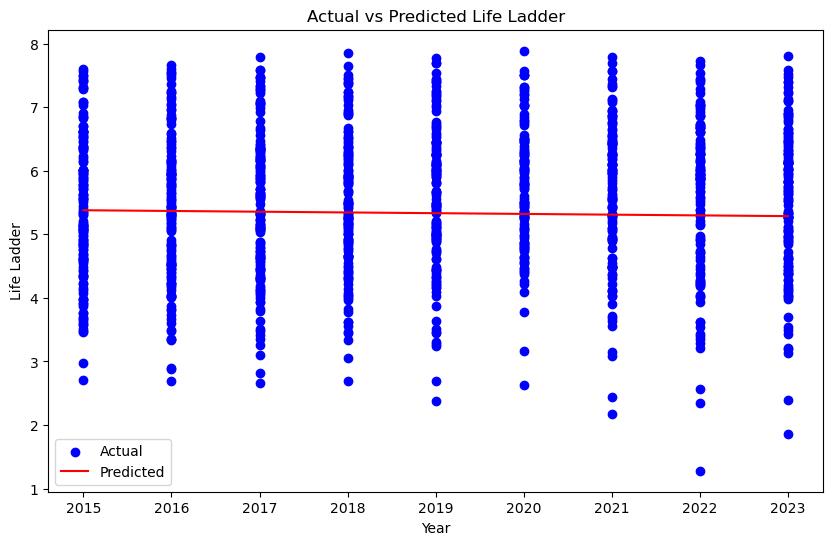

In [16]:
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_data['Year'], test_data['Life Ladder'], color='blue', label='Actual')
plt.plot(test_data['Year'], y_test_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Life Ladder')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

In [17]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_test_pred)
print("R^2 Score:", r2)

Mean Squared Error: 1.3159033091079715
R^2 Score: -0.0334097602482224


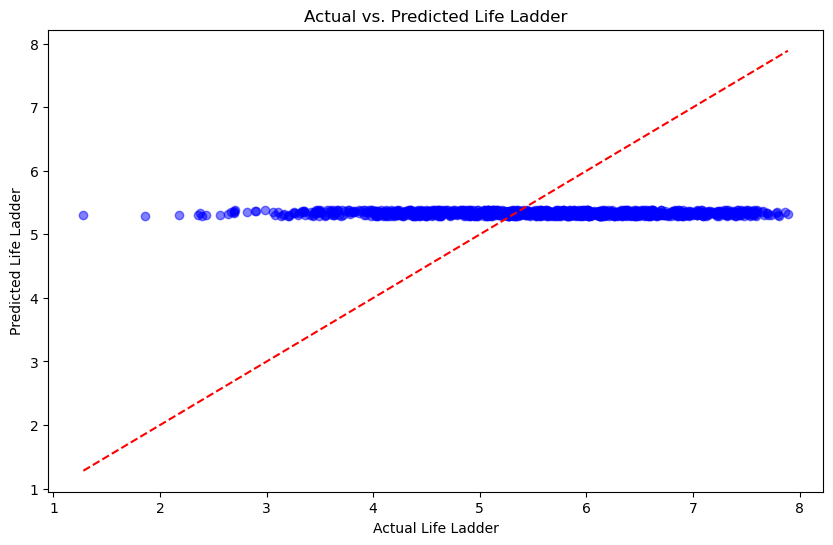

In [18]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs. Predicted Life Ladder')
plt.show()

In [19]:
# Make predictions on the test set
X_test = test_data['Year']
y_test = test_data['Life Ladder']
X_test_reshaped = X_test.values.reshape(-1, 1)
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 1.3159033091079715
Mean Absolute Error: 0.9445264392259428
Root Mean Squared Error: 1.1471282879904807
R-squared Score: -0.0334097602482224


C:\Users\Sean\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1.3159033091079715
Mean Absolute Error: 0.9445264392259428
Root Mean Squared Error: 1.1471282879904807
R^2 Score: -0.0334097602482224


In [21]:
# print(y_train.shape)

In [22]:
# print(X_train_reshaped.shape)

In [23]:
# # Evaluate the model
# y_pred = model.predict(X_test_encoded)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [24]:
# # Train the predictive model using the training data

# # Select features and target variable
# X_train = train_data['Year']
# y_train = train_data['Life Ladder']

# # Run the Linear Regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)

In [25]:
# Make predictions for the years 2015 to 2023

In [26]:
# Evaluate the model using metrics such as mean squared error (MSE) or R-squared

In [27]:
# Visualize the predicted values along with the actual data for comparison